# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

On importe les bibliothèques nécéssaires à l'exercice.

In [29]:
import numpy as np
from Tools.tools import rec
from Tools.tools import collection
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
import warnings
warnings.filterwarnings('ignore')

### Collection 

La fontion 'collection()' sert à enregistrer le dataset. 

In [30]:
#collection()

#### 1. Importez votre DataSet

In [31]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [32]:
mydata

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,12.415838,-5.999262,-2.797673,-5.514809,-15.810390,-14.559854,-19.882763,-3.637177,-1.307711,10.414146,-3.787594,-8.394803,0.0
1,11.640196,-9.006161,-3.858566,-8.126331,-17.623772,-16.155487,-19.092542,1.227401,5.155053,13.675569,-3.387412,-6.611336,1.0
2,11.835205,-7.964956,-2.799497,-6.148031,-13.818409,-11.379076,-17.393981,-1.948125,1.082748,9.216904,-6.465000,-9.618258,2.0
3,12.144253,-8.313670,-1.848456,-5.874728,-17.682939,-16.444877,-21.372110,-0.495679,3.095585,14.332539,-1.340018,-5.915885,3.0
4,11.934267,-9.407987,-5.308188,-8.898862,-17.139231,-12.867308,-19.183345,-0.429049,2.718711,14.358603,-0.774700,-5.684941,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,12.607325,-8.948624,-6.101906,-7.201585,-16.600043,-10.350188,-16.445341,-0.357002,1.501681,15.708107,1.767674,-5.225165,5.0
326,15.047757,-16.085862,-8.479102,0.925191,-16.706271,-9.765278,-15.038191,1.658406,-1.180630,15.571194,1.749007,-5.811766,6.0
327,12.343218,-10.665727,-7.693310,-7.322216,-16.507409,-10.035509,-16.767961,-2.463141,-2.196307,15.938146,0.490981,-5.765771,7.0
328,13.775563,-7.992276,-3.318546,-5.342028,-13.886054,-9.174829,-14.557717,-0.326272,0.121111,12.487456,-3.845689,-8.154156,8.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [33]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     330 non-null    float64
 1   Fe2     330 non-null    float64
 2   Fe3     330 non-null    float64
 3   Fe4     330 non-null    float64
 4   Fe5     330 non-null    float64
 5   Fe6     330 non-null    float64
 6   Fe7     330 non-null    float64
 7   Fe8     330 non-null    float64
 8   Fe9     330 non-null    float64
 9   Fe10    330 non-null    float64
 10  Fe11    330 non-null    float64
 11  Fe12    330 non-null    float64
 12  Target  330 non-null    float64
dtypes: float64(13)
memory usage: 33.6 KB


#### 3. Visualiser les targets

(array([33.,  0., 33.,  0., 33.,  0., 33.,  0., 33.,  0.,  0., 33.,  0.,
        33.,  0., 33.,  0., 33.,  0., 33.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

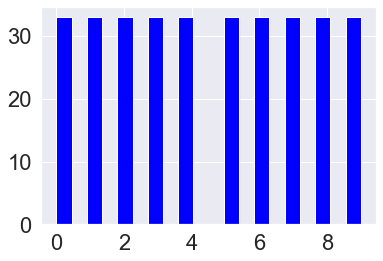

In [35]:
import matplotlib.pyplot as plt
hmag = mydata['Target']
plt.hist(hmag, 20, range=[0, 9], facecolor='blue', align='mid')

On affiche les résultats sous la forme d'un nuage de points. 

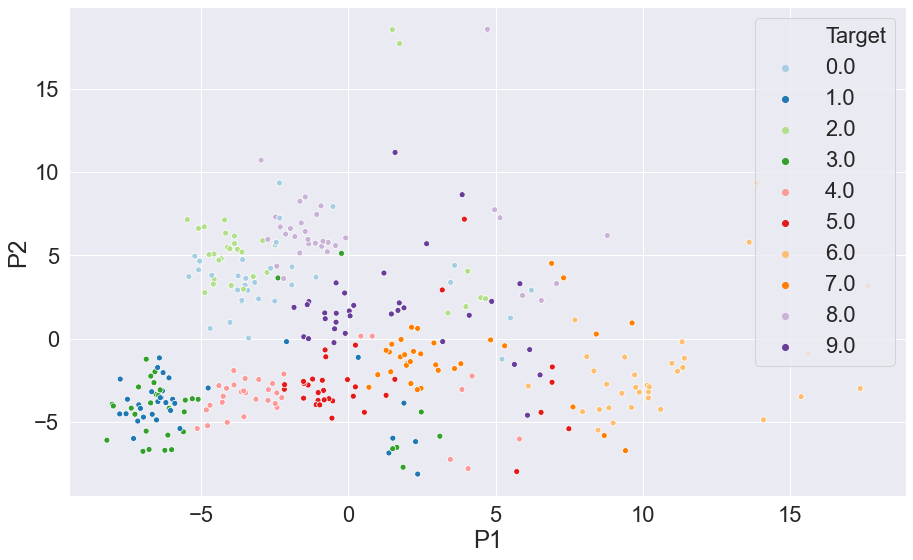

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récupérer X et y à partir du jeu de données 

In [37]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(330, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [82]:
scaler = StandardScaler().fit(X_train)

In [40]:
#X_train_scaled = scaler.transform(X_train)

In [41]:
#X_test_scaled = scaler.transform(X_test)

#### 7. Développez votre meilleur modèle de classification

In [58]:
from sklearn import neighbors, metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
#Création des pipeline
pipe_SVC = Pipeline([('scale', StandardScaler()), ('model', SVC(random_state=0))])

pipe_DecisionTreeClassifier = Pipeline([('scale', StandardScaler()), ('model', DecisionTreeClassifier(random_state=0))])

pipe_randomforest = Pipeline([('scale', StandardScaler()), ('model', RandomForestClassifier(random_state=0))])

pipe_XGBoost = Pipeline([('scale', StandardScaler()), ('model', XGBClassifier(random_state=0))])

pipe_KNN = Pipeline([('scale', StandardScaler()), ('KNN', KNeighborsClassifier())])

pipe_MLP = Pipeline([('scale', StandardScaler()), ('MLP', MLPClassifier(random_state=0))])

In [68]:
#GridSearch

grid_SVC_params = [{'model__kernel': ['linear', 'rbf'],
                    'model__C':[1,10]}]

grid_XG_params = [{'model__learning_rate':[0.05,0.1,0.15],
                 'model__max_depth':[1,2,3,4],
                  'model__eval_metric' : ['mlogloss']}]
        
grid_forest_params = [{'model__n_estimators':[30,40,50],
                      'model__max_depth':[None, 1],
                      'model__min_samples_split':[4,5,6],
                      'model__min_samples_leaf':[1,2,3,4]}]

grid_KNN_params = [{'KNN__n_neighbors': [1, 2, 3, 4, 5, 6], 
                    'KNN__weights': ['uniform', 'distance'], 
                    'KNN__algorithm': ['auto'],
                    'KNN__metric': ['euclidean', 'manhattan', 'minkowski'], 
                    'KNN__p' : [2, 3, 4, 5, 6]}]

grid_tree_params = [{'model__criterion':['gini','entropy'],
                    'model__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]

grid_MLP_params = [{'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 
                    'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu'], 
                    'MLP__random_state' : [0, 1, 2, 3, 4]}]

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
#On applique le GridSearch aux méthodes désignées plus haut
grid_search_SVC = GridSearchCV(estimator=pipe_SVC,
                              param_grid=grid_SVC_params,
                              scoring='accuracy',
                              cv=2)
grid_search_XG = GridSearchCV(estimator=pipe_XGBoost,
                              param_grid=grid_XG_params,
                              scoring='accuracy',
                              cv=2)
grid_search_rf = GridSearchCV(estimator=pipe_randomforest,
                              param_grid=grid_forest_params,
                              scoring='accuracy',
                              cv=2)
grid_search_dt = GridSearchCV(estimator=pipe_DecisionTreeClassifier,
                              param_grid=grid_tree_params,
                              scoring='accuracy',
                              cv=2)
grid_search_KNN = GridSearchCV(estimator=pipe_KNN,
                              param_grid=grid_KNN_params,
                              scoring='accuracy',
                              cv=2)
grid_search_MLP = GridSearchCV(estimator=pipe_MLP,
                              param_grid=grid_MLP_params,
                              scoring='accuracy',
                              cv=2)

#### Calcul résultats

Random Forest 

In [71]:
RF = grid_search_rf.fit(X_train,y_train)
print(RF.best_params_)
RF.score(X_train,y_train)

{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}


1.0

Support Vector Classification

In [72]:
SVC = grid_search_SVC.fit(X_train,y_train)
print (SVC.best_params_)
SVC.score(X_train,y_train)

{'model__C': 1, 'model__kernel': 'linear'}


0.9810606060606061

Decision Tree Classifier

In [73]:
DT = grid_search_dt.fit(X_train,y_train)
print(DT.best_params_)
DT.score(X_train,y_train)

{'model__criterion': 'gini', 'model__max_depth': 9}


0.9810606060606061

XGBooster

In [74]:
XG = grid_search_XG.fit(X_train,y_train)
print(XG.best_params_)
XG.score(X_train,y_train)

{'model__eval_metric': 'mlogloss', 'model__learning_rate': 0.1, 'model__max_depth': 1}


0.9696969696969697

KNN

In [76]:
KNN = grid_search_KNN.fit(X_train,y_train)
print(KNN.best_params_)
KNN.score(X_train,y_train)

{'KNN__algorithm': 'auto', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1, 'KNN__p': 2, 'KNN__weights': 'uniform'}


1.0

MLP

In [87]:
MLP = grid_search_MLP.fit(X_train,y_train)
print (MLP.best_params_)
MLP.score(X_train,y_train)

{'MLP__activation': 'tanh', 'MLP__hidden_layer_sizes': (100,), 'MLP__random_state': 1}


0.9772727272727273

# Application en Temps Réel

In [77]:
from Tools.tools import rec
from Tools.tools import collection

In [86]:
rec(scaler, XG)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 
------------------
Digit :  1.0
------------------


In [ ]:
from joblib import dump, load
dump(knn, 'model')